### Testing the cell-based model on QUBICC data

**The figures for the paper were created in /additional_content/plots_offline_paper**

<a id='import_cell_1'></a>

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import importlib

import tensorflow as tf
from tensorflow.keras.models import load_model
# Add path with my_classes to sys.path
sys.path.insert(0, '/home/b/b309170/workspace_icon-ml/iconml_clc/')

from my_classes import load_data

In [2]:
root_path = '/home/b/b309170'
model_path = os.path.join(root_path,
                          'workspace_icon-ml/cloud_cover_parameterization/grid_cell_based_v3/saved_models')

*Load models*

In [3]:
model = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_1.h5'))
model_2 = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_2.h5'))
model_3 = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_3.h5'))
model_4 = load_model(os.path.join(model_path, 'model_grid_cell_based_v3_final_4.h5'))

*Load data*

In [4]:
order_of_vars = ['hus', 'cli', 'ta', 'pfull', 'zg', 'fr_land', 'cl']

# Loads the NARVAL data into the data_dict dictionary (only November 20-29)
# data_dict = load_data(source='qubicc', days='nov_2nd', order_of_vars=order_of_vars)
data_dict = load_data(source='qubicc', days='nov_20s', order_of_vars=order_of_vars)

hus
cli
ta
pfull
cl


In [5]:
(TIME_STEPS, VERT_LAYERS, HORIZ_FIELDS) = data_dict['cl'].shape

#Reshaping into nd-arrays of equaling shapes (have timesteps x vert x hor)
data_dict['zg'] = np.repeat(np.expand_dims(data_dict['zg'], 0), data_dict['hus'].shape[0], axis=0)
data_dict['fr_land'] = np.repeat(np.expand_dims(data_dict['fr_land'], 0), data_dict['hus'].shape[0], axis=0)
data_dict['fr_land'] = np.repeat(np.expand_dims(data_dict['fr_land'], 1), data_dict['hus'].shape[1], axis=1)

assert data_dict['fr_land'].shape == data_dict['hus'].shape == data_dict['zg'].shape

In [6]:
#Convert cl-information from [0, 1] to [0, 100]
data_dict['cl'] = data_dict['cl']*100

In [7]:
# Reshaping into 1D-arrays and converting dict into a DataFrame-object (the following is based on Aurelien Geron)
for key in order_of_vars:
    data_dict[key] = np.reshape(data_dict[key], -1)

df = pd.DataFrame.from_dict(data_dict)
df.head()

,hus,cli,ta,pfull,zg,fr_land,cl
0,0.000003,NaN,212.353090,1317.135167,28193.783559,0.962171,NaN
1,0.000003,NaN,210.387287,1297.793932,28193.783559,0.951717,NaN
2,0.000003,NaN,211.042658,1300.559399,28193.783559,0.935673,NaN
3,0.000003,NaN,212.524111,1319.868143,28193.783559,0.978353,NaN
4,0.000003,NaN,210.386940,1293.293409,28193.783559,0.873864,NaN


<a id='df'></a>

Scaling the input (as Dataframes)

In [30]:
mean_1 = np.array([5.37518440e-03, 4.65389731e-07, 2.59635412e+02, 5.52329389e+04,
 6.79260772e+03, 2.58097095e-01])
std_1 = np.array([6.01943993e-03, 3.95009930e-06, 3.55940285e+01, 3.26642242e+04,
 6.20726361e+03, 4.28313535e-01])
mean_2 = np.array([5.37610303e-03, 4.66308203e-07, 2.59638223e+02, 5.52356240e+04,
 6.79210873e+03, 2.58209529e-01])
std_2 = np.array([6.01992404e-03, 3.97009561e-06, 3.55942162e+01, 3.26643948e+04,
 6.20707739e+03, 4.28369264e-01])
mean_3 = np.array([5.37583902e-03, 4.66074476e-07, 2.59638431e+02, 5.52355186e+04,
 6.79205353e+03, 2.58202179e-01])
std_3 = np.array([6.01948591e-03, 3.95929476e-06, 3.55926320e+01, 3.26636321e+04,
 6.20697197e+03, 4.28360743e-01])
mean_4 = np.array([5.37588425e-03, 4.64950307e-07, 2.59637648e+02, 5.52343099e+04,
 6.79192465e+03, 2.58183961e-01])
std_4 = np.array([6.01996561e-03, 3.95040241e-06, 3.55910392e+01, 3.26622989e+04,
 6.20628503e+03, 4.28359352e-01])

In [31]:
# We add a clc entry in the means and stds
ind_clc = np.where(df.columns=='cl')[0][0]
mean_1 = np.insert(mean_1, ind_clc, values=0)
mean_2 = np.insert(mean_2, ind_clc, values=0)
mean_3 = np.insert(mean_3, ind_clc, values=0)
mean_4 = np.insert(mean_4, ind_clc, values=0)
std_1 = np.insert(std_1, ind_clc, values=1)
std_2 = np.insert(std_2, ind_clc, values=1)
std_3 = np.insert(std_3, ind_clc, values=1)
std_4 = np.insert(std_4, ind_clc, values=1)

In [32]:
# Note that after standardization the mean and variance are not 0 and 1 respectively 
# as the data values above 21km are still in the data
df_1 = ((df - mean_1)/std_1).to_numpy()
df_2 = ((df - mean_2)/std_2).to_numpy()
df_3 = ((df - mean_3)/std_3).to_numpy()
df_4 = ((df - mean_4)/std_4).to_numpy()

<a id='df_1234'></a>

In [ ]:
# Note that there are still nans in the dataset as I have not removed data above 21km yet!
np.std(df_1, axis=0) #Note that deviations from 1 are most likely due to the data above 21km still being in the dataset!

### Mean Cloud Cover per vertical layer
Mean profile of Cloud Cover on x-axis with Vertical Layer on y-axis <br>

Define the indices of the j-th vertical layer

<a id='preparing_to_plot'></a>

In [33]:
# --- The number of horizontal fields is different
# (1635, 31, 1024) was the original shape of the data (= timesteps x vertical x horizontal)
def add_two_arrays(a, b):
    '''
    Adding all elements of two arrays with each other, creating a new array.
    Thus: len(add_two_arrays(a,b)) = len(a)*len(b)
    '''
    c = []
    for i in range(len(a)):
        for j in range(len(b)):
            c.append(a[i]+b[j])
    return np.array(c)

Computing the vertical-layer mean of the predictions for cloud cover

In [26]:
# We are not interested in the output of layers above 21km (therefore the range starts at 4)
clc_mean = []
r2_values = []
n_features = df_1.shape[1]-1
ind_features = np.delete(np.arange(n_features+1), ind_clc) #We remove the output-class from the feature-indices
df_1_features = df_1[:, ind_features]

for v_layer in range(4, VERT_LAYERS):
    # The indices corresponding to a specific v_layer:
    ind = v_layer*HORIZ_FIELDS + add_two_arrays(VERT_LAYERS*HORIZ_FIELDS*np.arange(TIME_STEPS), 
                                                np.arange(HORIZ_FIELDS))
    assert np.sum(np.isnan(df_1_features[ind,:])) == 0 # Actually no nans go into the model
    pred = model.predict(df_1_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)  #Cloud Cover is enforced between 0 and 100. 
                                                     #This should also be done in practice
        
    ## ADD CODE TO COMPUTE R2 PER VERTICAL LAYER FOR MODEL
    mse = np.mean((pred_adj - ...)**2) 
    r2_values = 
    clc_mean.append(np.mean(pred_adj))  #Contains the mean predictions per vertical layer


The vertical-layer mean cloud cover given by the data

In [27]:
# We are not interested in the output of layers above 21km (therefore the range starts at 4)
clc_data_mean = []
for v_layer in range(4, VERT_LAYERS):
    # The indices corresponding to a specific v_layer:
    ind = v_layer*HORIZ_FIELDS + add_two_arrays(VERT_LAYERS*HORIZ_FIELDS*np.arange(TIME_STEPS), 
                                                np.arange(HORIZ_FIELDS))
    clc_data_mean.append(np.mean(df_1[ind,ind_clc]))

The vertical-layer mean cloud cover predicted by the other models

In [30]:
clc_mean_2 = []
clc_mean_3 = []
clc_mean_4 = []

df_2_features = df_2[:, ind_features]
df_3_features = df_3[:, ind_features]
df_4_features = df_4[:, ind_features]

for v_layer in range(4, VERT_LAYERS):
    ind = v_layer*HORIZ_FIELDS + add_two_arrays(VERT_LAYERS*HORIZ_FIELDS*np.arange(TIME_STEPS), 
                                                np.arange(HORIZ_FIELDS))
    assert np.sum(np.isnan(df_2_features[ind,:])) == 0 # Actually no nans go into the model
    pred = model_2.predict(df_2_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)
    clc_mean_2.append(np.mean(pred_adj))
for v_layer in range(4, VERT_LAYERS):
    ind = v_layer*HORIZ_FIELDS + add_two_arrays(VERT_LAYERS*HORIZ_FIELDS*np.arange(TIME_STEPS), 
                                                np.arange(HORIZ_FIELDS))
    assert np.sum(np.isnan(df_3_features[ind,:])) == 0 # Actually no nans go into the model
    pred = model_3.predict(df_3_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)
    clc_mean_3.append(np.mean(pred_adj))
for v_layer in range(4, VERT_LAYERS):
    ind = v_layer*HORIZ_FIELDS + add_two_arrays(VERT_LAYERS*HORIZ_FIELDS*np.arange(TIME_STEPS), 
                                                np.arange(HORIZ_FIELDS))
    assert np.sum(np.isnan(df_4_features[ind,:])) == 0 # Actually no nans go into the model
    pred = model_4.predict(df_4_features[ind,:])
    pred_adj = np.minimum(np.maximum(pred, 0), 100)
    clc_mean_4.append(np.mean(pred_adj))
    
## ADD CODE TO COMPUTE R2 PER VERTICAL LAYER FOR MODEL2, MODEL3, MODEL4

<a id='preparations_end'></a>

Plotting

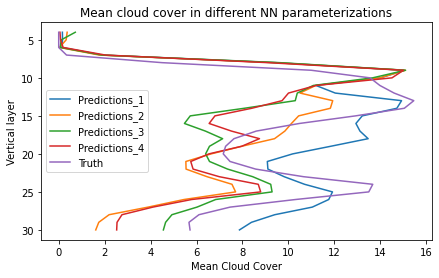

In [16]:
a = np.linspace(4, VERT_LAYERS-1, 27)
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Vertical layer', 
                     title='Mean cloud cover in different NN parameterizations')
ax.plot(clc_mean, a)
ax.plot(clc_mean_2, a)
ax.plot(clc_mean_3, a)
ax.plot(clc_mean_4, a)
ax.plot(clc_data_mean, a)
plt.gca().invert_yaxis()
ax.legend(['Predictions_1', 'Predictions_2', 'Predictions_3', 'Predictions_4', 'Truth'])
fig.savefig('../figures/qubicc_offline_testing_mean_cloud_cover_NNs.pdf')

Mean height of a vertical layer as y-axis

In [17]:
zg_mean = []
ind_zg = np.where(df.columns=='zg')[0][0]
for v_layer in range(4, VERT_LAYERS):
    ind = v_layer*HORIZ_FIELDS + add_two_arrays(VERT_LAYERS*HORIZ_FIELDS*np.arange(TIME_STEPS), 
                                                np.arange(HORIZ_FIELDS))
    zg_mean.append(np.mean(df_1[ind, ind_zg])*std_1[ind_zg]+mean_1[ind_zg])

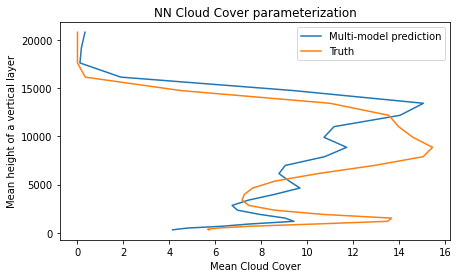

In [18]:
clc_mm_mean = 1/4*(np.array(clc_mean)+np.array(clc_mean_2)+np.array(clc_mean_3)+np.array(clc_mean_4))

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Mean height of a vertical layer', 
                     title='NN Cloud Cover parameterization')
ax.plot(clc_mm_mean, zg_mean)
ax.plot(clc_data_mean, zg_mean)
ax.legend(['Multi-model prediction', 'Truth'])
fig.savefig('../figures/qubicc_offline_testing_mean_cloud_cover.pdf')
# plt.gca().invert_yaxis()

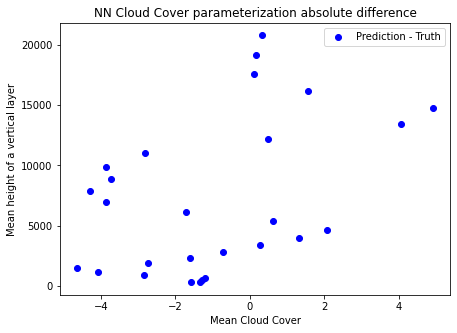

In [19]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Mean height of a vertical layer', 
                     title='NN Cloud Cover parameterization absolute difference')
ax.plot(clc_mm_mean - np.array(clc_data_mean), zg_mean, 'bo')
ax.legend(['Prediction - Truth'])
fig.savefig('../figures/qubicc_offline_testing_mean_cloud_cover_absolute_difference.pdf')
# plt.gca().invert_yaxis()
# NN Cloud Cover parameterization absolute difference

### Hovmöller diagrams
Hovmöller diagram (time on x-axis with vertical layers on y-axis and NN ensemble mean clc in color) <br>
Looking at November, 2nd here.

In [ ]:
# All vertical layers from first time step
pred_clc_mat = np.zeros((24, VERT_LAYERS))
for i in range(24):
    for j in range(VERT_LAYERS):
        # Mean prediction for a specific time step and vertical layer
        df_1_features = np.delete(df_1, ind_clc, axis=1)
        pred_1 = model.predict(df_1_features[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1),:]) 
        pred_adj_1 = np.mean(np.minimum(np.maximum(pred_1, 0), 100))
        df_2_features = np.delete(df_2, ind_clc, axis=1)
        pred_2 = model_2.predict(df_2_features[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1),:]) 
        pred_adj_2 = np.mean(np.minimum(np.maximum(pred_2, 0), 100))
        df_3_features = np.delete(df_3, ind_clc, axis=1)
        pred_3 = model_3.predict(df_3_features[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1),:]) 
        pred_adj_3 = np.mean(np.minimum(np.maximum(pred_3, 0), 100))
        df_4_features = np.delete(df_4, ind_clc, axis=1)
        pred_4 = model_4.predict(df_4_features[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1),:]) 
        pred_adj_4 = np.mean(np.minimum(np.maximum(pred_4, 0), 100))
        pred_clc_mat[i,j] = 1/4*(pred_adj_1+pred_adj_2+pred_adj_3+pred_adj_4)       

In [ ]:
data_clc_mat = np.zeros((24, VERT_LAYERS))
for i in range(24):
    for j in range(VERT_LAYERS):
        # Mean cloud cover for a specific time step and vertical layer
        data_clc_1 = np.mean(df_1[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1), ind_clc])
        data_clc_2 = np.mean(df_2[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1), ind_clc])
        data_clc_3 = np.mean(df_3[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1), ind_clc])
        data_clc_4 = np.mean(df_4[HORIZ_FIELDS*(VERT_LAYERS*i+j):HORIZ_FIELDS*(VERT_LAYERS*i+j+1), ind_clc])
        data_clc_mat[i,j] = 1/4*(data_clc_1+data_clc_2+data_clc_3+data_clc_4)

In [ ]:
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable

capped_matrix = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix_data = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix[:, 4:] = pred_clc_mat[:, 4:]
capped_matrix_data[:, 4:] = data_clc_mat[:, 4:]

# Crucial so that the colorbar will actually match both plots
vmax = np.maximum(np.max(capped_matrix), np.max(capped_matrix_data))
vmin = np.minimum(np.min(capped_matrix), np.min(capped_matrix_data))
# t = np.linspace(1, 25, 25)
# v = np.linspace(9, 75)
# T, V = np.meshgrid(t, v)
fig = plt.figure(figsize=(12,8))
ax_2 = fig.add_subplot(122, xlabel='Hours', ylim=[VERT_LAYERS-1, 4], title='True mean cloud cover (One day)')
ims_2 = ax_2.imshow(np.transpose(capped_matrix_data), vmin=vmin, vmax=vmax)
# Colorbar axes
divider = make_axes_locatable(ax_2)
cax_2 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ims_2, cax=cax_2)

ax_1 = fig.add_subplot(121, xlabel='Hours', ylim=[VERT_LAYERS-1, 4], ylabel='Vertical layers', title='NN ensemble mean cloud cover (One day)')
ims_1 = ax_1.imshow(np.transpose(capped_matrix), vmin=vmin, vmax=vmax)
# Colorbar axes
divider = make_axes_locatable(ax_1)
cax_1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ims_1, cax=cax_1)
fig.savefig('../figures/qubicc_offline_testing_hovmoeller.pdf')

In [ ]:
from matplotlib.colors import DivergingNorm

capped_matrix = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix_data = np.zeros((pred_clc_mat.shape[0], pred_clc_mat.shape[1]))
capped_matrix[:, 4:] = pred_clc_mat[:, 4:]
capped_matrix_data[:, 4:] = data_clc_mat[:, 4:]
# t = np.linspace(1, 24, 24)
# v = np.linspace(4, VERT_LAYERS)
# T, V = np.meshgrid(t, v)
fig = plt.figure(figsize=(8,8))

ax_1 = fig.add_subplot(111, xlabel='Hours', ylim=[VERT_LAYERS-1, 4], ylabel='Vertical layers', title='Deviation of grid cell based NN ensemble mean cloud cover (One day)')
ims_1 = ax_1.imshow(np.transpose(capped_matrix) - np.transpose(capped_matrix_data), norm=DivergingNorm(0), cmap='bwr')
# Colorbar axes
divider = make_axes_locatable(ax_1)
cax_1 = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(ims_1, cax=cax_1)
fig.savefig('../figures/qubicc_offline_testing_hovmoeller_diff.pdf')

### In NARVAL region only
Interpret NN parameterizations on QUBICC data in NARVAL region

Run cells 1-7 first: [import_cell_1](#import_cell_1) to [df](#df).

In [9]:
# We reshape data_dict back into 3D. 
for key in data_dict.keys():
    data_dict[key] = np.reshape(data_dict[key], (TIME_STEPS, VERT_LAYERS, HORIZ_FIELDS)) 

In [10]:
for keys in data_dict.keys():
    print(data_dict[keys].shape)

(240, 31, 14826)
(240, 31, 14826)
(240, 31, 14826)
(240, 31, 14826)
(240, 31, 14826)
(240, 31, 14826)
(240, 31, 14826)


We need to:
1) Reinsert nans that arose through overlapping topography during vertical interpolation into the QUBICC data
2) Set fields from outside the NARVAL region to nan
3) We select the fields where the lowermost levels are not nan

Step 1): So that we have 20480 horizontal fields and can compare that directly to the R02B04-grid. <br>
Note that data_dict.shape[2] != data_dict_new.shape[2]

Step 3) should leave us with only those grid columns that are in the NARVAL region and that have been coarse-grained without producing nans in QUBICC 

*1. Overlapping nans*

In [13]:
path = '/home/b/b309170/my_work/QUBICC/data_var_vertinterp/cli'
file_name = 'int_var_hc2_02_p1m_cli_ml_20041112T200000Z_R02B04.nc'

In [14]:
DS = xr.open_dataset(os.path.join(path, file_name))
da_cli = DS.cli.values
overlap_nans = np.isnan(da_cli[0,30,:])
overlap_nans.shape

(20480,)

In [15]:
# Create new data_dict with correct dimensionality
data_dict_new = {}
for key in data_dict.keys():
    data_dict_new[key] = np.zeros((TIME_STEPS, VERT_LAYERS, len(overlap_nans)))

In [16]:
# ov_f is a temporary array that is adjusted depending on the key, time step and vertical layer
ov_f = np.array(overlap_nans, dtype=float)
ov_f[np.where(ov_f == 1)] = np.nan # Every True in overlap_nans will be a nan
ov_f_copy = ov_f.copy() # Need this otherwise ov_f == 0 will never be true anymore when beginning the loop

for key in data_dict.keys():
    for i in range(TIME_STEPS):
        for j in range(VERT_LAYERS):
            ov_f_copy[np.where(ov_f == 0)] = data_dict[key][i,j,:] 
            data_dict_new[key][i,j,:] = ov_f_copy    

In [17]:
for keys in data_dict_new.keys():
    print(data_dict_new[keys].shape)

(240, 31, 20480)
(240, 31, 20480)
(240, 31, 20480)
(240, 31, 20480)
(240, 31, 20480)
(240, 31, 20480)
(240, 31, 20480)


*2. Which of these entries are from the NARVAL region?*

In [18]:
# path = '/pf/b/b309170/my_work/NARVAL/data/temp'
# file_name = 'temp_R02B04_NARVALI_2013121600_fg_DOM01_0012.nc'

In [19]:
# DS = xr.open_dataset(os.path.join(path, file_name))
# da_temp = DS.temp.values
# narval_nans = np.isnan(da_temp[0,0,:])
# narval_nans.shape

In [20]:
# # Keep only the narval region
# for key in data_dict.keys():
#     for i in range(TIME_STEPS):
#         for k in range(20480): # Horizontal fields
#             if narval_nans[k]:
#                 for j in range(VERT_LAYERS):
#                     data_dict_new[key][i,j,k] = np.nan 

In [21]:
# Entire tropical zone or NARVAL region?

region = 'tropical_zone' # 'NARVAL_region' or 'tropical_zone'

if region == 'NARVAL_region':
    # Narval region: 68W-15E, 10S-20N
    lat_lower_bound = -10/90*np.pi/2
    lat_upper_bound = 20/90*np.pi/2
    lon_lower_bound = -68/180*np.pi
    lon_upper_bound = 15/180*np.pi
elif region == 'tropical_zone':
    # Tropical zone: 23.4365S-23.4365N (Narval region: 68W-15E, 10S-20N)
    lat_lower_bound = -23.4365/90*np.pi/2
    lat_upper_bound = 23.4365/90*np.pi/2
    lon_lower_bound = -np.pi #Basically unbounded
    lon_upper_bound = np.pi #Basically unbounded

In [23]:
#Load native grid
qubicc_r02b04_path = '/home/b/b309170/my_work/QUBICC/grids/icon_grid_0013_R02B04_G.nc'
qubicc_r02b04 = xr.open_dataset(qubicc_r02b04_path)

qubicc_lat = qubicc_r02b04.lat_cell_centre.values
qubicc_lon = qubicc_r02b04.lon_cell_centre.values

In [24]:
# Keep only the narval region
for key in data_dict.keys():
    for i in range(TIME_STEPS):
        for k in range(20480): # Horizontal fields
            # If k-th entry of the qubicc r02b04 grid is in narval region
            if not (lat_lower_bound <= qubicc_lat[k] <= lat_upper_bound and lon_lower_bound <= qubicc_lon[k] <= lon_upper_bound):
                if key != 'fr_lake':
                    data_dict_new[key][i,:,k] = np.full(VERT_LAYERS, np.nan)
                else:
                    data_dict_new[key][i,k] = np.nan 

*3. We select the fields where the lowermost levels are not nan*

In [25]:
not_nan = ~np.isnan(data_dict_new['cli'][0,30,:])

In [26]:
# Create new data_dict with correct dimensionality
data_dict_selected_fields = {}
for key in data_dict.keys():
    data_dict_selected_fields[key] = data_dict_new[key][:,:,not_nan]

In [27]:
# Update the number of horizontal fields
HORIZ_FIELDS = np.sum(not_nan)
HORIZ_FIELDS

5924

In [28]:
# for keys in data_dict_nan_free.keys():
#     print(data_dict_nan_free[keys].shape)
#     assert np.sum(np.isnan(data_dict_nan_free[keys])) == 0

Now we can reshape back:

In [29]:
#Reshaping into 1D-arrays and converting dict into a DataFrame-object (the following is based on Aurelien Geron)
for key in data_dict_selected_fields.keys():
    data_dict_selected_fields[key] = np.reshape(data_dict_selected_fields[key], -1) 

df = pd.DataFrame.from_dict(data_dict_selected_fields)
df.head() 

,hus,cli,ta,pfull,zg,fr_land,cl
0,0.000002,NaN,225.831369,1510.237356,28193.783559,0.000000,NaN
1,0.000002,NaN,225.952429,1509.318380,28193.783559,0.000000,NaN
2,0.000002,NaN,225.755507,1511.066808,28193.783559,0.000201,NaN
3,0.000002,NaN,225.726365,1512.730028,28193.783559,0.000000,NaN
4,0.000002,NaN,225.998721,1512.610258,28193.783559,0.000000,NaN


Run cells 17-20 ([df](#df) to [df_1234](#df_1234)), 22-25 ([preparing_to_plot](#preparing_to_plot) to [preparations_end](#preparations_end))

Plotting

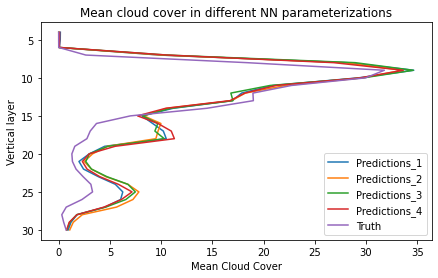

In [67]:
a = np.linspace(4, VERT_LAYERS-1, 27)
fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Vertical layer', 
                     title='Mean cloud cover in different NN parameterizations')
ax.plot(clc_mean, a)
ax.plot(clc_mean_2, a)
ax.plot(clc_mean_3, a)
ax.plot(clc_mean_4, a)
ax.plot(clc_data_mean, a)
plt.gca().invert_yaxis()
ax.legend(['Predictions_1', 'Predictions_2', 'Predictions_3', 'Predictions_4', 'Truth'])
fig.savefig('../figures/qubicc_offline_testing_mean_cloud_cover_NNs_%s.pdf'%region)

Mean height of a vertical layer as y-axis

In [68]:
zg_mean = []
ind_zg = np.where(df.columns=='zg')[0][0]
for v_layer in range(4, VERT_LAYERS):
    ind = v_layer*HORIZ_FIELDS + add_two_arrays(VERT_LAYERS*HORIZ_FIELDS*np.arange(TIME_STEPS), 
                                                np.arange(HORIZ_FIELDS))
    zg_mean.append(np.mean(df_1[ind, ind_zg])*std_1[ind_zg]+mean_1[ind_zg])

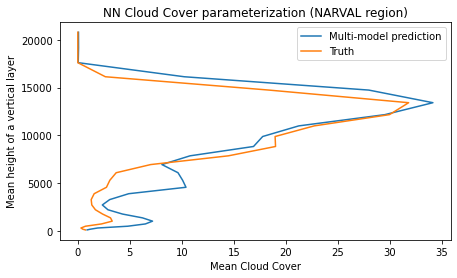

In [69]:
clc_mm_mean = 1/4*(np.array(clc_mean)+np.array(clc_mean_2)+np.array(clc_mean_3)+np.array(clc_mean_4))

fig = plt.figure(figsize=(7,4))
ax = fig.add_subplot(111, xlabel='Mean Cloud Cover', ylabel='Mean height of a vertical layer', 
                     title='NN Cloud Cover parameterization (NARVAL region)')
ax.plot(clc_mm_mean, zg_mean)
ax.plot(clc_data_mean, zg_mean)
ax.legend(['Multi-model prediction', 'Truth'])
fig.savefig('../figures/qubicc_offline_testing_mean_cloud_cover_NARVAL_region.pdf')
# plt.gca().invert_yaxis()

In [31]:
print(region)
print(clc_mean)
print(clc_mean_2)
print(clc_mean_3)
print(clc_mean_4)
print(clc_data_mean)

tropical_zone
[0.15736295, 0.15274493, 0.06565799, 4.176406, 20.910957, 29.254648, 23.316257, 15.156468, 11.761119, 10.1261835, 7.0172415, 4.6615605, 5.005597, 5.6094112, 6.104761, 2.878184, 1.9090832, 1.8492719, 2.6939914, 4.2556667, 6.0831566, 7.248291, 6.129422, 4.2516294, 1.7357204, 1.2261177, 1.0574754]
[0.00017305734, 2.8148223e-05, 0.0046518496, 4.0609317, 20.651888, 28.432058, 23.636719, 16.245956, 11.946389, 10.328751, 6.7022767, 4.658968, 5.6041265, 5.937484, 5.8609, 3.1938555, 2.2170613, 2.191171, 3.1945727, 4.824811, 7.0514216, 8.384941, 7.0139537, 5.198739, 2.0905154, 1.376609, 1.17824]
[0.00015054007, 0.0374156, 0.009418714, 4.380656, 21.32772, 28.866224, 23.873734, 15.252654, 11.239496, 10.357843, 6.9255853, 4.5894456, 5.2216663, 5.6148124, 5.833749, 3.200389, 2.1620767, 2.2620413, 3.2071805, 5.006263, 7.0676866, 8.070071, 6.462448, 4.4225936, 1.6102619, 1.050646, 0.8796077]
[0.08999668, 0.079954915, 0.06318151, 4.569084, 20.078367, 28.357086, 23.558226, 15.327372, 11.93